<a href="https://colab.research.google.com/github/dudubouneto/-AED-Binary-Tree/blob/main/IDHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proposta de discretização - IDHM

##Faixas de IDHM do IPEA

https://www.ipea.gov.br/portal/images/stories/PDFs/130729_AtlasPNUD_2013.pdf



*   0-499: Muito Baixo
*   500-599: Baixo
*   600-699: Médio
*   700-799: Alto
*   800-1000: Muito Alto



**OBS.:** O IDHM é a média geométrica da expectativa de vida, do IDHM educação (Escolaridade da pop.adulta e fluxo escolar da pop. jovem) e da renda per capita (utiliza o PNB). Assim, o índice não contém outros parâmetros da base de dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# carregando dados
drive.mount('/content/drive_eduardo')

Drive already mounted at /content/drive_eduardo; to attempt to forcibly remount, call drive.mount("/content/drive_eduardo", force_remount=True).


In [ ]:
# carregando dataframe
ibge_sp = pd.read_csv('/content/drive_eduardo/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
ibge_sp.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Município                  645 non-null    object
 1   Codigo_IBGE                645 non-null    int64 
 2   Gentílico                  645 non-null    object
 3   Prefeito                   645 non-null    object
 4   Área Territorial           645 non-null    object
 5   População Estimada         645 non-null    int64 
 6   Densidade Demográfica      645 non-null    object
 7   Escolarização 6 a 14 anos  645 non-null    object
 8   IDHM                       645 non-null    int64 
 9   Mortalidade Infantil       645 non-null    object
 10  Receitas Realizadas        645 non-null    object
 11  Despesas empenhadas        645 non-null    object
 12  PIB per capita             645 non-null    object
 13  Latitude                   645 non-null    object
 14  Longitude 

In [ ]:
ibge_sp = ibge_sp[['Município','IDHM']]
ibge_sp.head()

,Município,IDHM
0,ADAMANTINA,790
1,ADOLFO,730
2,AGUAÍ,715
3,ÁGUAS DA PRATA,781
4,ÁGUAS DE LINDÓIA,745


In [ ]:
bins = [0, 499, 599, 699, 799, 1000]
labels = ['IDHM muito baixo', 'IDHM baixo', 'IDHM médio', 'IDHM alto', 'IDHM muito alto']
ibge_sp['Classificacao_IDHM'] = pd.cut(ibge_sp['IDHM'], bins=bins, labels=labels)
ibge_sp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Município,IDHM,Classificacao_IDHM
0,ADAMANTINA,790,IDHM alto
1,ADOLFO,730,IDHM alto
2,AGUAÍ,715,IDHM alto
3,ÁGUAS DA PRATA,781,IDHM alto
4,ÁGUAS DE LINDÓIA,745,IDHM alto
...,...,...,...
640,VOTORANTIM,767,IDHM alto
641,VOTUPORANGA,790,IDHM alto
642,ZACARIAS,729,IDHM alto
643,CHAVANTES,729,IDHM alto


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Município           645 non-null    object  
 1   IDHM                645 non-null    int64   
 2   Classificacao_IDHM  645 non-null    category
dtypes: category(1), int64(1), object(1)
memory usage: 11.0+ KB


In [ ]:
ibge_sp['Classificacao_IDHM'].value_counts()

IDHM alto           559
IDHM médio           62
IDHM muito alto      24
IDHM muito baixo      0
IDHM baixo            0
Name: Classificacao_IDHM, dtype: int64

###Histograma

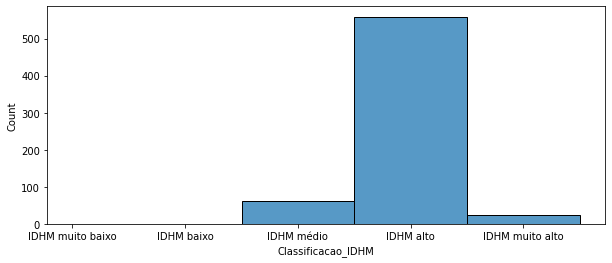

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=ibge_sp['Classificacao_IDHM'])

Como uma maioria avassaladora cai na classificação de IDHM alto (87%), essa distribuição não é tão interessante para nós...

##Distribuição por quartis

In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Município           645 non-null    object  
 1   IDHM                645 non-null    int64   
 2   Classificacao_IDHM  645 non-null    category
dtypes: category(1), int64(1), object(1)
memory usage: 11.0+ KB


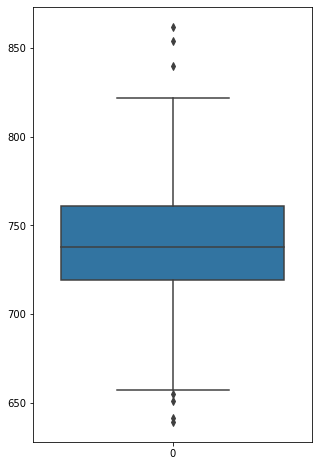

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(data=ibge_sp['IDHM'])

Como há poucos outliers (e eles não são tão distoantes), iremos incluí-los sem criar uma bin separada (outliers de baixo serão considerados "médios" e os de cima "muito altos").

In [ ]:
bins = [0, ibge_sp['IDHM'].quantile(.25), ibge_sp['IDHM'].quantile(.5), ibge_sp['IDHM'].quantile(.75), ibge_sp['IDHM'].max()]
labels = ['IDHM médio', 'IDHM médio-alto', 'IDHM alto', 'IDHM muito alto']
ibge_sp['Classificacao_IDHM'] = pd.cut(ibge_sp['IDHM'], bins=bins, labels=labels)
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Município           645 non-null    object  
 1   IDHM                645 non-null    int64   
 2   Classificacao_IDHM  645 non-null    category
dtypes: category(1), int64(1), object(1)
memory usage: 11.0+ KB


In [ ]:
ibge_sp.head()

,Município,IDHM,Classificacao_IDHM
0,ADAMANTINA,790,IDHM muito alto
1,ADOLFO,730,IDHM médio-alto
2,AGUAÍ,715,IDHM médio
3,ÁGUAS DA PRATA,781,IDHM muito alto
4,ÁGUAS DE LINDÓIA,745,IDHM alto


###Histograma da distribuição proposta

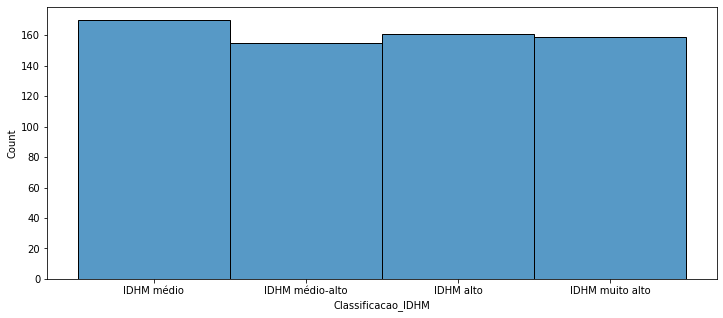

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=ibge_sp['Classificacao_IDHM'])